In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("/content/Austin-2019-01-01-to-2023-07-22.csv")

In [ ]:
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000,1664.000000,...,1664.000000,1664.000000,1664.000000,1664.000000,1664.00000,1664.000000,1664.000000,1664.000000,559.000000,1664.000000
mean,80.871094,60.095012,69.791827,82.424700,59.345012,70.424519,55.555168,64.579567,0.084632,28.245192,...,11.753425,155.483954,1015.985096,43.380048,9.27530,174.142488,15.027163,6.512019,39.409660,0.481358
std,15.074327,14.748907,14.351736,17.125754,16.120580,16.284259,15.161742,13.449047,0.304253,45.032733,...,3.782494,95.390825,5.979587,30.028990,1.10608,77.842223,6.722887,2.404866,32.600965,0.289650
min,22.600000,8.200000,15.700000,12.800000,-7.100000,4.000000,-0.700000,18.400000,0.000000,0.000000,...,3.400000,0.100000,1000.300000,0.000000,2.50000,8.500000,0.700000,0.000000,10.000000,0.000000
25%,71.500000,47.900000,58.900000,71.500000,46.200000,58.775000,44.175000,56.100000,0.000000,0.000000,...,9.000000,88.275000,1012.000000,16.700000,9.10000,114.350000,9.900000,5.000000,10.000000,0.240000
50%,82.500000,62.950000,71.900000,83.000000,62.950000,71.850000,60.650000,65.100000,0.000000,0.000000,...,11.400000,163.250000,1014.800000,39.850000,9.80000,181.100000,15.700000,7.000000,30.000000,0.490000
75%,92.800000,73.700000,82.300000,97.525000,73.700000,84.300000,68.600000,73.625000,0.004000,100.000000,...,14.100000,185.400000,1019.500000,67.450000,9.90000,240.100000,20.700000,8.000000,75.000000,0.750000
max,107.900000,82.900000,92.300000,117.000000,90.700000,99.300000,76.500000,97.900000,3.369000,100.000000,...,28.600000,359.900000,1040.100000,100.000000,9.90000,346.100000,29.800000,10.000000,100.000000,0.980000


In [ ]:
features = ['tempmax', 'tempmin', 'humidity', 'dew']
target = 'precip'
data = df.dropna(subset=features + [target])

In [ ]:
X,y = data[features], data[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)

In [ ]:
r_2 = r2_score(y_test,y_pred)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.04974770851826499
Root Mean Squared Error: 0.22304194340586478
R-squared: 0.1661984442789477


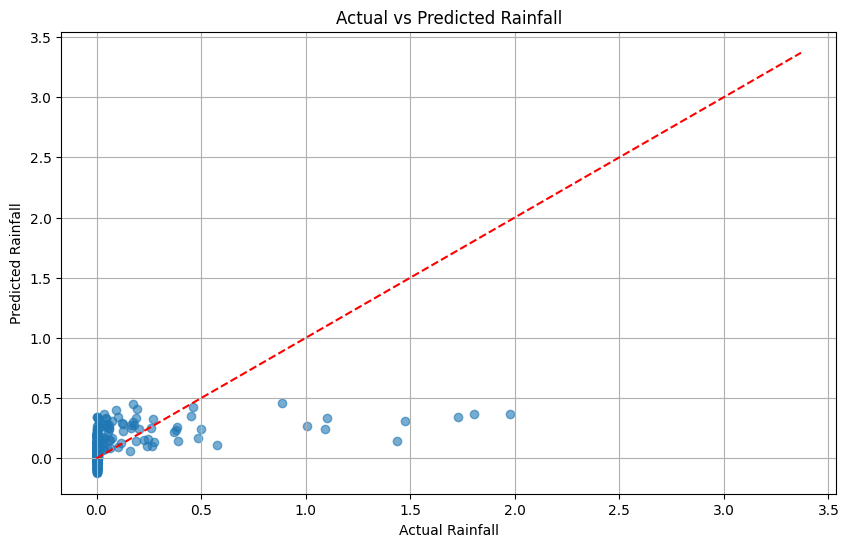

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Rainfall')
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.grid()
plt.show()

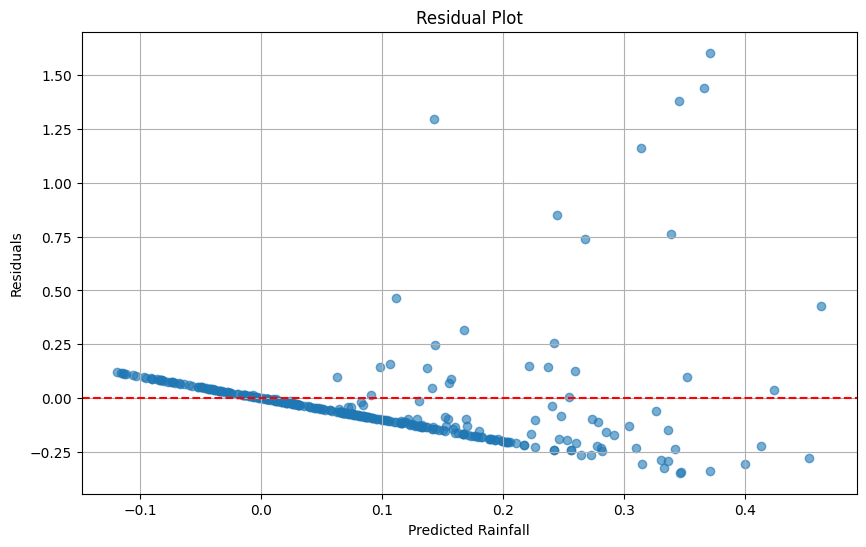

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Rainfall')
plt.ylabel('Residuals')
plt.grid()
plt.show()